In [36]:
from statistics import median

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
data = pd.read_csv('trip.csv')

In [38]:
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22701 non-null  object 
 1   tpep_pickup_datetime   22701 non-null  object 
 2   tpep_dropoff_datetime  22701 non-null  object 
 3   payment_method         22701 non-null  object 
 4   passenger_count        22701 non-null  int64  
 5   trip_distance          22701 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22701 non-null  float64
 8   tolls_amount           22701 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB


In [40]:
data.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22701.000000,22701.000000,22698.000000,22701.000000,22701.000000
mean,1.643584,2.913400,13.024009,1.835745,0.312514
std,1.304942,3.653023,13.240074,2.800537,1.399153
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


In [51]:
data2 = data.copy()
data2 = data.drop_duplicates()
data2

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.00
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.00
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.00
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.00
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.00
...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.00
22697,Monique Williams,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64,5.76
22698,Drew Graves,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1,0.42,4.5,0.00,0.00
22699,Jonathan Copeland,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1,2.36,10.5,1.70,0.00



### 1-1. 결측치 판단 및 처리

(결측치가 있는 행을 날리거나, 결측치를 중앙값으로 바꾸기)

In [52]:
data2.isna()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
22696,False,False,False,False,False,False,False,False,False
22697,False,False,False,False,False,False,False,False,False
22698,False,False,False,False,False,False,False,False,False
22699,False,False,False,False,False,False,False,False,False


In [53]:
data2.isna().sum()

passenger_name           0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
payment_method           0
passenger_count          0
trip_distance            0
fare_amount              3
tip_amount               0
tolls_amount             0
dtype: int64

In [54]:
data2.isna().mean()*100

passenger_name           0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
payment_method           0.000000
passenger_count          0.000000
trip_distance            0.000000
fare_amount              0.013216
tip_amount               0.000000
tolls_amount             0.000000
dtype: float64

In [55]:
data2[data2['fare_amount'].isna()]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
52,Benjamin Johnson,04/04/2017 4:22:03 PM,04/04/2017 4:35:30 PM,Cash,1,2.20,NaN,0.0,0.00
189,Maria Ibarra,08/21/2017 12:40:25 PM,08/21/2017 1:12:31 PM,Debit Card,3,15.20,NaN,5.0,0.00
244,Tina Avila,08/09/2017 8:32:09 AM,08/09/2017 9:31:11 AM,Cash,1,15.89,NaN,10.0,5.76


In [59]:

data2 = data[data['fare_amount'] > 0].copy()
data2['fare_amount'] = data2['fare_amount'].fillna(data2['fare_amount'].median())

In [60]:
data2[data2['fare_amount'].isna()]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount


### 1-2. 이상치 판단 및 처리

In [98]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22678 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22678 non-null  object 
 1   tpep_pickup_datetime   22678 non-null  object 
 2   tpep_dropoff_datetime  22678 non-null  object 
 3   payment_method         22678 non-null  object 
 4   passenger_count        22678 non-null  int64  
 5   trip_distance          22678 non-null  float64
 6   fare_amount            22678 non-null  float64
 7   tip_amount             22678 non-null  float64
 8   tolls_amount           22678 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.7+ MB


In [99]:
print(data2['passenger_count'].sort_values())


21754     0
21640     0
21218     0
20312     0
19458     0
         ..
20674     6
5336      6
12249     6
6671      6
64       36
Name: passenger_count, Length: 22678, dtype: int64


<Axes: xlabel='None', ylabel='passenger_count'>

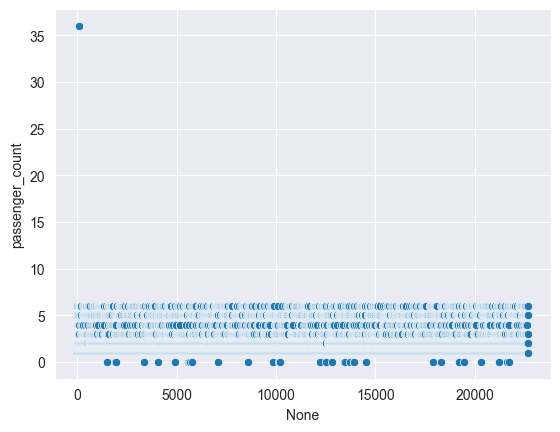

In [100]:
sns.scatterplot(x=data2.index, y=data2['passenger_count'])

In [101]:
data3 = data2.copy()
data3['passenger_count'] = data2['passenger_count'].apply(lambda x : data2['passenger_count'].median() if x >= 35 else x)

In [102]:
data3

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6.0,3.34,13.0,2.76,0.00
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1.0,1.80,16.0,4.00,0.00
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1.0,1.00,6.5,1.45,0.00
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1.0,3.70,20.5,6.39,0.00
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1.0,4.37,16.5,0.00,0.00
...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3.0,0.61,4.0,0.00,0.00
22697,Monique Williams,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1.0,16.71,52.0,14.64,5.76
22698,Drew Graves,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1.0,0.42,4.5,0.00,0.00
22699,Jonathan Copeland,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1.0,2.36,10.5,1.70,0.00


<Axes: xlabel='None', ylabel='passenger_count'>

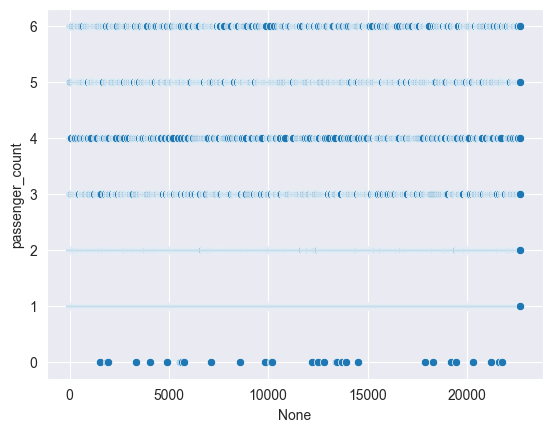

In [103]:
sns.scatterplot(x=data3.index, y=data3['passenger_count'])

In [104]:
data3.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22678.000000,22678.000000,22678.000000,22678.000000,22678.000000
mean,1.642076,2.913512,13.042705,1.836945,0.312026
std,1.284844,3.650193,13.208887,2.800797,1.397021
min,0.000000,0.000000,0.010000,0.000000,0.000000
25%,1.000000,1.000000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.070000,14.500000,2.450000,0.000000
max,6.000000,33.960000,999.990000,200.000000,19.100000


### 2-1. 택시 탑승 및 하차 시간 활용

In [105]:
data3.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6.0,3.34,13.0,2.76,0.0
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1.0,1.80,16.0,4.00,0.0
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1.0,1.00,6.5,1.45,0.0
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1.0,3.70,20.5,6.39,0.0
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1.0,4.37,16.5,0.00,0.0


In [106]:
# 이름 열 필요 없음
data4 = data3.drop(labels = "passenger_name", axis = 1)
data4

,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6.0,3.34,13.0,2.76,0.00
1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1.0,1.80,16.0,4.00,0.00
2,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1.0,1.00,6.5,1.45,0.00
3,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1.0,3.70,20.5,6.39,0.00
4,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1.0,4.37,16.5,0.00,0.00
...,...,...,...,...,...,...,...,...
22696,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3.0,0.61,4.0,0.00,0.00
22697,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1.0,16.71,52.0,14.64,5.76
22698,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1.0,0.42,4.5,0.00,0.00
22699,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1.0,2.36,10.5,1.70,0.00


In [107]:
from datetime import datetime

In [108]:
data4['tpep_pickup_datetime'] = pd.to_datetime(data4['tpep_pickup_datetime'])

In [109]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22678 entries, 0 to 22700
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tpep_pickup_datetime   22678 non-null  datetime64[ns]
 1   tpep_dropoff_datetime  22678 non-null  object        
 2   payment_method         22678 non-null  object        
 3   passenger_count        22678 non-null  float64       
 4   trip_distance          22678 non-null  float64       
 5   fare_amount            22678 non-null  float64       
 6   tip_amount             22678 non-null  float64       
 7   tolls_amount           22678 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 1.6+ MB


In [110]:
data4['tpep_dropoff_datetime'] = pd.to_datetime(data4['tpep_dropoff_datetime'])

In [111]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22678 entries, 0 to 22700
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tpep_pickup_datetime   22678 non-null  datetime64[ns]
 1   tpep_dropoff_datetime  22678 non-null  datetime64[ns]
 2   payment_method         22678 non-null  object        
 3   passenger_count        22678 non-null  float64       
 4   trip_distance          22678 non-null  float64       
 5   fare_amount            22678 non-null  float64       
 6   tip_amount             22678 non-null  float64       
 7   tolls_amount           22678 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(1)
memory usage: 1.6+ MB


In [112]:
data5 = data4.copy()
data5['time_taken'] = data5['tpep_dropoff_datetime'] - data5['tpep_pickup_datetime']
data5

,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,time_taken
0,2017-03-25 08:55:43,2017-03-25 09:09:47,Debit Card,6.0,3.34,13.0,2.76,0.00,0 days 00:14:04
1,2017-04-11 14:53:28,2017-04-11 15:19:58,Debit Card,1.0,1.80,16.0,4.00,0.00,0 days 00:26:30
2,2017-12-15 07:26:56,2017-12-15 07:34:08,Debit Card,1.0,1.00,6.5,1.45,0.00,0 days 00:07:12
3,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1.0,3.70,20.5,6.39,0.00,0 days 00:30:15
4,2017-04-15 23:32:20,2017-04-15 23:49:03,Debit Card,1.0,4.37,16.5,0.00,0.00,0 days 00:16:43
...,...,...,...,...,...,...,...,...,...
22696,2017-02-24 17:37:23,2017-02-24 17:40:39,Cash,3.0,0.61,4.0,0.00,0.00,0 days 00:03:16
22697,2017-08-06 16:43:59,2017-08-06 17:24:47,Cash,1.0,16.71,52.0,14.64,5.76,0 days 00:40:48
22698,2017-09-04 14:54:14,2017-09-04 14:58:22,Debit Card,1.0,0.42,4.5,0.00,0.00,0 days 00:04:08
22699,2017-07-15 12:56:30,2017-07-15 13:08:26,Debit Card,1.0,2.36,10.5,1.70,0.00,0 days 00:11:56


In [113]:
data5[data5['payment_method'].duplicated()]

,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,time_taken
1,2017-04-11 14:53:28,2017-04-11 15:19:58,Debit Card,1.0,1.80,16.0,4.00,0.00,0 days 00:26:30
2,2017-12-15 07:26:56,2017-12-15 07:34:08,Debit Card,1.0,1.00,6.5,1.45,0.00,0 days 00:07:12
4,2017-04-15 23:32:20,2017-04-15 23:49:03,Debit Card,1.0,4.37,16.5,0.00,0.00,0 days 00:16:43
5,2017-03-25 20:34:11,2017-03-25 20:42:11,Debit Card,6.0,2.30,9.0,2.06,0.00,0 days 00:08:00
6,2017-05-03 19:04:09,2017-05-03 20:03:47,Cash,1.0,12.83,47.5,9.86,0.00,0 days 00:59:38
...,...,...,...,...,...,...,...,...,...
22696,2017-02-24 17:37:23,2017-02-24 17:40:39,Cash,3.0,0.61,4.0,0.00,0.00,0 days 00:03:16
22697,2017-08-06 16:43:59,2017-08-06 17:24:47,Cash,1.0,16.71,52.0,14.64,5.76,0 days 00:40:48
22698,2017-09-04 14:54:14,2017-09-04 14:58:22,Debit Card,1.0,0.42,4.5,0.00,0.00,0 days 00:04:08
22699,2017-07-15 12:56:30,2017-07-15 13:08:26,Debit Card,1.0,2.36,10.5,1.70,0.00,0 days 00:11:56


In [114]:
data5['payment_method'] = data5['payment_method'].apply(lambda x : 'Cash' if x == 'Cash' else 'Card')

In [95]:
data5

0        Card
1        Card
2        Card
3        Cash
4        Card
         ... 
22696    Cash
22697    Cash
22698    Card
22699    Card
22700    Cash
Name: payment_method, Length: 22678, dtype: object

#### 상관관계
#### 차트

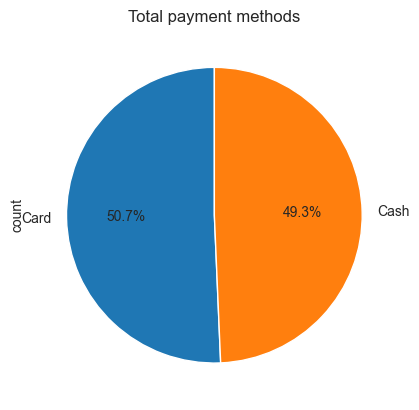

In [117]:
# 전체 기간 기준, 결제 수단 카드와 현금 비율
data5['payment_method'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Total payment methods')
plt.show()

In [122]:
# 월별 승객 수
data6 = data5.copy()
data6['pickup_datetime'] = data5['tpep_pickup_datetime'].dt.date
data6['pickup_datetime'] = data6['tpep_pickup_datetime'].dt.to_period('M')
data6

,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,time_taken,pickup_datetime
0,2017-03-25 08:55:43,2017-03-25 09:09:47,Card,6.0,3.34,13.0,2.76,0.00,0 days 00:14:04,2017-03
1,2017-04-11 14:53:28,2017-04-11 15:19:58,Card,1.0,1.80,16.0,4.00,0.00,0 days 00:26:30,2017-04
2,2017-12-15 07:26:56,2017-12-15 07:34:08,Card,1.0,1.00,6.5,1.45,0.00,0 days 00:07:12,2017-12
3,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1.0,3.70,20.5,6.39,0.00,0 days 00:30:15,2017-05
4,2017-04-15 23:32:20,2017-04-15 23:49:03,Card,1.0,4.37,16.5,0.00,0.00,0 days 00:16:43,2017-04
...,...,...,...,...,...,...,...,...,...,...
22696,2017-02-24 17:37:23,2017-02-24 17:40:39,Cash,3.0,0.61,4.0,0.00,0.00,0 days 00:03:16,2017-02
22697,2017-08-06 16:43:59,2017-08-06 17:24:47,Cash,1.0,16.71,52.0,14.64,5.76,0 days 00:40:48,2017-08
22698,2017-09-04 14:54:14,2017-09-04 14:58:22,Card,1.0,0.42,4.5,0.00,0.00,0 days 00:04:08,2017-09
22699,2017-07-15 12:56:30,2017-07-15 13:08:26,Card,1.0,2.36,10.5,1.70,0.00,0 days 00:11:56,2017-07


In [128]:
monthly_passenger = data6.groupby(['pickup_datetime'])['passenger_count'].sum()

In [129]:
monthly_passenger

pickup_datetime
2017-01    3331.0
2017-02    2911.0
2017-03    3313.0
2017-04    3228.0
2017-05    3307.0
2017-06    3267.0
2017-07    2893.0
2017-08    2894.0
2017-09    2817.0
2017-10    3199.0
2017-11    3038.0
2017-12    3041.0
Freq: M, Name: passenger_count, dtype: float64

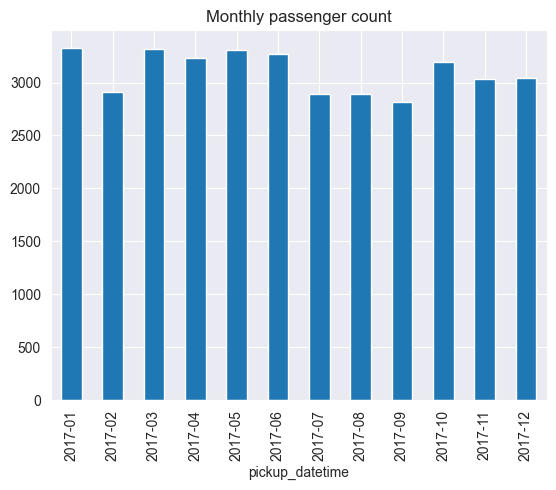

In [130]:
monthly_passenger.plot(kind='bar')
plt.title('Monthly passenger count')
plt.show()

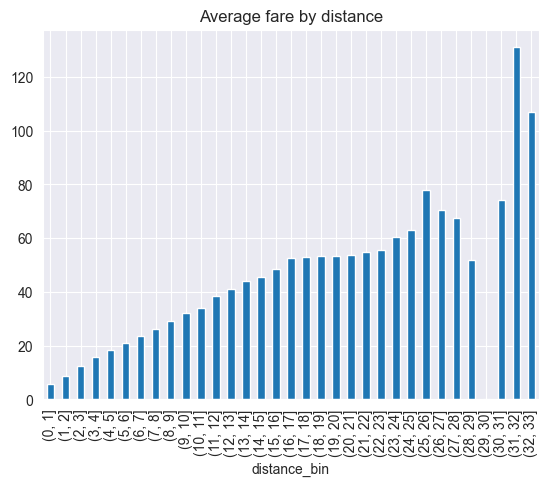

In [134]:
# 거리별 요금 평균
data6['distance_bin'] = pd.cut(data6['trip_distance'], bins = range(0, 34, 1))
avg_fare_by_distance = data6.groupby(['distance_bin'], observed = False)['fare_amount'].mean()
avg_fare_by_distance.plot(kind='bar')
plt.title('Average fare by distance')
plt.show()

In [135]:
# 거리별 요금이 이상하게 들쭉날쭉 26 ~ 33

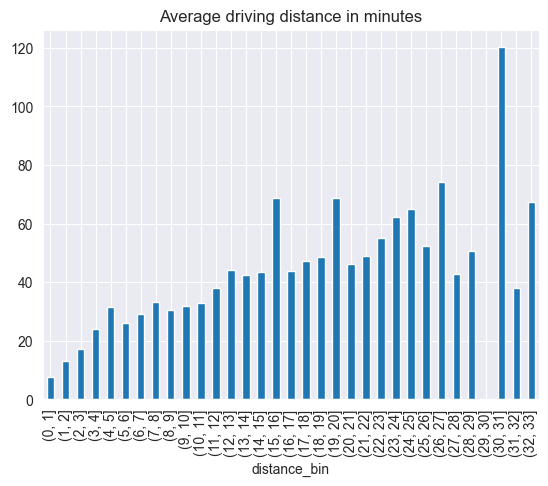

In [143]:
# 거리별 주행시간
data6['distance_bin'] = pd.cut(data6['trip_distance'], bins = range(0, 34, 1))
avg_driving_distance = data6.groupby(['distance_bin'], observed = False)['time_taken'].mean()
avg_driving_distance_minutes = avg_driving_distance.dt.total_seconds() / 60
avg_driving_distance_minutes.plot(kind='bar')
plt.title('Average driving distance in minutes')
plt.show()

In [144]:
# 상관계수
# 주행 거리와 요금간의 상관 관계 (강한 양의 상관)
data6[['trip_distance','fare_amount']].corr()

,trip_distance,fare_amount
trip_distance,1.000000,0.758395
fare_amount,0.758395,1.000000
